### Loads and Initialization

In [ ]:
!pip install chromadb
!pip install sentence_transformers
!pip install open-clip-torch
!pip install datasets

In [ ]:
import os
import chromadb
from matplotlib import pyplot as plt
from chromadb.utils.data_loaders import ImageLoader
import chromadb.utils.embedding_functions as embedding_functions
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction

In [ ]:
# Initialize the ChromaDB client
client = chromadb.Client()

# Test if the service is up and running
print(client.heartbeat())

1711181029131894032


### CRUD

Коллекции

In [ ]:
# Creating a collection
dune_collection = client.create_collection(name="dune")
print(dune_collection)

name='dune' id=UUID('5a8d63ea-c0b4-4f01-bb6c-f54b3f85531f') metadata=None tenant='default_tenant' database='default_database'


In [ ]:
# Changing the collection name
dune_collection.modify(name="dune_movie")
print(dune_collection)

name='dune_movie' id=UUID('5a8d63ea-c0b4-4f01-bb6c-f54b3f85531f') metadata=None tenant='default_tenant' database='default_database'


In [ ]:
# Get or Create a new collection, change the distance function (from l2)
dune_collection = client.get_or_create_collection(name="dune_movie", metadata={"hnsw:space": "cosine"})
print(dune_collection)

name='dune_movie' id=UUID('5a8d63ea-c0b4-4f01-bb6c-f54b3f85531f') metadata={'hnsw:space': 'cosine'} tenant='default_tenant' database='default_database'


In [ ]:
# Deleting a collection
try:
    client.delete_collection(name="dune_movie")
    print("Dune collection deleted.")
except ValueError as e:
    print(f"Error: {e}")

Dune collection deleted.


Объекты

In [ ]:
dune_collection = client.create_collection(name="dune")

In [ ]:
# Adding raw documents
dune_collection.add(
     documents=["This is only the beginning.", "Here I am, here I remain."], ids=["quote_1", "quote_2"]
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:02<00:00, 39.4MiB/s]


In [ ]:
# Counting items in a collection
item_count = dune_collection.count()
print(f"Count of items in collection: {item_count}")

Count of items in collection: 2


In [ ]:
# Updating the information
dune_collection.update(
     ids=["quote_1"], documents=["This is the end."]
)

In [ ]:
# Get items from the collection
items = dune_collection.get()
print(items)

{'ids': ['quote_1', 'quote_2'], 'embeddings': None, 'metadatas': [None, None], 'documents': ['This is the end.', 'Here I am, here I remain.'], 'uris': None, 'data': None}


In [ ]:
# Update if exists or insert if doesn't
dune_collection.upsert(
     ids=["quote_1", "quote_3"], documents=["This is only the beginning.", "Dreams are messages from the deep."]
)

items = dune_collection.get()
print(items)

{'ids': ['quote_1', 'quote_2', 'quote_3'], 'embeddings': None, 'metadatas': [None, None, None], 'documents': ['This is only the beginning.', 'Here I am, here I remain.', 'Dreams are messages from the deep.'], 'uris': None, 'data': None}


In [ ]:
# Delete items
dune_collection.delete(
    ids=["quote_1", "quote_2"]
)

items = dune_collection.get()
print(items)

{'ids': ['quote_3'], 'embeddings': None, 'metadatas': [None], 'documents': ['Dreams are messages from the deep.'], 'uris': None, 'data': None}


In [ ]:
# Delete and create again to show other adding techniques
try:
    client.delete_collection(name="dune")
    print("Dune collection deleted.")
except ValueError as e:
    print(f"Error: {e}")

dune_collection = client.create_collection(name="dune")

Dune collection deleted.


In [ ]:
# Adding document-associated embeddings
dune_collection.add(
    documents=[
         "An animal caught in a trap will gnaw off its own leg to escape.",
         "A great man doesn't seek to lead.",
    ],
    embeddings=[[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]],
    ids=["quote_1", "quote_2"],
)

In [ ]:
# Adding embeddings and metadata
dune_collection.add(
    embeddings=[[0.7, 0.8, 0.9], [0.12, 0.34, 0.56]],
    metadatas=[
        {"category": "quote", "speaker": "Chani"},
        {"category": "quote", "speaker": "Paul Atreides"},
    ],
    ids=["quote_3", "quote_4"],
)

In [ ]:
item_count = dune_collection.count()
print(f"Count of items in collection: {item_count}")

items = dune_collection.get()
print(items)

Count of items in collection: 4
{'ids': ['quote_1', 'quote_2', 'quote_3', 'quote_4'], 'embeddings': None, 'metadatas': [None, None, {'category': 'quote', 'speaker': 'Chani'}, {'category': 'quote', 'speaker': 'Paul Atreides'}], 'documents': ['An animal caught in a trap will gnaw off its own leg to escape.', "A great man doesn't seek to lead.", None, None], 'uris': None, 'data': None}


In [ ]:
try:
    client.delete_collection(name="dune")
    print("Dune collection deleted.")
except ValueError as e:
    print(f"Error: {e}")

Dune collection deleted.


### Поиск элемента

In [ ]:
dune_collection = client.create_collection(name="dune")

dune_collection.add(
    documents=[
        "This is only the beginning.",
        "My planet, Arrakis, is so beautiful when the sun is low.",
        "Holy war spreading across the universe like unquenchable fire.",
        "My road leads into the desert.",
        "Here I am, here I remain.",
        "A great man doesn't seek to lead.",
        "You fight when the necessity arises, no matter the mood.",
        "But Arrakis is Arrakis and the desert takes the weak.",
        "An animal caught in a trap will gnaw off its own leg to escape.",
        "Dreams are messages from the deep."
    ],
    embeddings=[[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [0.12, 0.34, 0.56], [0.78, 0.91, 0.23],
                [0.45, 0.67, 0.89], [0.3, 0.6, 0.9], [0.2, 0.5, 0.8], [0.1, 0.4, 0.7], [0.12, 0.78, 0.45]],
    metadatas=[
        {"category": "quote", "speaker": "Chani"},
        {"category": "quote", "speaker": "Chani"},
        {"category": "quote", "speaker": "Paul Atreides"},
        {"category": "quote", "speaker": "Paul Atreides"},
        {"category": "quote", "speaker": "Duke Leto Atreides"},
        {"category": "quote", "speaker": "Duke Leto Atreides"},
        {"category": "quote", "speaker": "Gurney Halleck"},
        {"category": "quote", "speaker": "Baron Vladimir Harkonnen"},
        {"category": "quote", "speaker": "Gaius Helen Mohiam"}, # Преподобная Мать Бене Гессерит
        {"category": "quote", "speaker": "Narrator"}
    ],
    ids=["quote_1", "quote_2", "quote_3", "quote_4", "quote_5", "quote_6", "quote_7", "quote_8", "quote_9", "quote_10"],
)

In [ ]:
# Querying by a set of query_embeddings
results = dune_collection.query(
    query_embeddings=[[0.4, 0.5, 0.6]],
    n_results=2
)

print(results)

{'ids': [['quote_2', 'quote_8']], 'distances': [[0.0, 0.07999999821186066]], 'metadatas': [[{'category': 'quote', 'speaker': 'Chani'}, {'category': 'quote', 'speaker': 'Baron Vladimir Harkonnen'}]], 'embeddings': None, 'documents': [['My planet, Arrakis, is so beautiful when the sun is low.', 'But Arrakis is Arrakis and the desert takes the weak.']], 'uris': None, 'data': None}


In [ ]:
try:
    client.delete_collection(name="dune")
    print("Dune collection deleted.")
except ValueError as e:
    print(f"Error: {e}")

dune_collection = client.create_collection(name="dune")

dune_collection.add(
    documents=[
        "This is only the beginning.",
        "My planet, Arrakis, is so beautiful when the sun is low.",
        "Holy war spreading across the universe like unquenchable fire.",
        "My road leads into the desert.",
        "Here I am, here I remain.",
        "A great man doesn't seek to lead.",
        "You fight when the necessity arises, no matter the mood.",
        "But Arrakis is Arrakis and the desert takes the weak.",
        "An animal caught in a trap will gnaw off its own leg to escape.",
        "Dreams are messages from the deep."
    ],
    metadatas=[
        {"category": "quote", "speaker": "Chani"},
        {"category": "quote", "speaker": "Chani"},
        {"category": "quote", "speaker": "Paul Atreides"},
        {"category": "quote", "speaker": "Paul Atreides"},
        {"category": "quote", "speaker": "Duke Leto Atreides"},
        {"category": "quote", "speaker": "Duke Leto Atreides"},
        {"category": "quote", "speaker": "Gurney Halleck"},
        {"category": "quote", "speaker": "Baron Vladimir Harkonnen"},
        {"category": "quote", "speaker": "Gaius Helen Mohiam"}, # Преподобная Мать Бене Гессерит
        {"category": "quote", "speaker": "Narrator"}
    ],
    ids=["quote_1", "quote_2", "quote_3", "quote_4", "quote_5", "quote_6", "quote_7", "quote_8", "quote_9", "quote_10"],
)

Dune collection deleted.


In [ ]:
# Querying by a set of query_texts
results = dune_collection.query(
    query_texts=["seek to lead"],
    n_results=2,
)

print(results)

{'ids': [['quote_6', 'quote_4']], 'distances': [[0.9187361001968384, 1.3585925102233887]], 'metadatas': [[{'category': 'quote', 'speaker': 'Duke Leto Atreides'}, {'category': 'quote', 'speaker': 'Paul Atreides'}]], 'embeddings': None, 'documents': [["A great man doesn't seek to lead.", 'My road leads into the desert.']], 'uris': None, 'data': None}


In [ ]:
# Query the collection by text and choose which data is returned
results = dune_collection.query(
    query_texts=["seek to lead"], n_results=1, include=["distances", "embeddings"]
)

print(results)

{'ids': [['quote_6']], 'distances': [[0.9187361001968384]], 'metadatas': None, 'embeddings': [[[0.08826041221618652, 0.011389188468456268, -0.025821169838309288, 0.008432570844888687, -0.0403892807662487, -0.03786851838231087, -0.014518733136355877, -0.0649656131863594, -0.07557588815689087, 0.002914448967203498, -0.019282955676317215, 0.017949070781469345, 0.013964220881462097, -0.012333745136857033, -0.030360084027051926, -0.037614937871694565, -0.05674514174461365, -0.11592406779527664, 0.033599670976400375, 0.032324984669685364, 0.01740056835114956, 0.07658654451370239, 0.061119917780160904, -0.03610535338521004, -0.08145971596240997, -0.029256144538521767, 0.030042534694075584, -0.0405966080725193, 0.00641247071325779, 0.016915036365389824, -0.00010731052316259593, -0.06914278119802475, -0.005948261823505163, 0.0580427385866642, 0.004756399430334568, 0.009058362804353237, 0.009526417590677738, 0.06398699432611465, -0.007400432135909796, -0.04446413367986679, 0.051028475165367126, 

In [ ]:
# Querying with where filters
results = dune_collection.query(
    query_texts=["Arrakis"],
    where={"speaker": "Chani"},
    n_results=2,
)

print(results)

{'ids': [['quote_2', 'quote_1']], 'distances': [[0.9902421832084656, 1.754502534866333]], 'metadatas': [[{'category': 'quote', 'speaker': 'Chani'}, {'category': 'quote', 'speaker': 'Chani'}]], 'embeddings': None, 'documents': [['My planet, Arrakis, is so beautiful when the sun is low.', 'This is only the beginning.']], 'uris': None, 'data': None}


In [ ]:
try:
    client.delete_collection(name="dune")
    print("Dune collection deleted.")
except ValueError as e:
    print(f"Error: {e}")

Dune collection deleted.


### Вместо сортировки: подключение к Hugging Face

Есть интеграции с другими сервисами. Можно подключиться к Hugging Face и поменять модель.

In [ ]:
em = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="all-mpnet-base-v2") #default: all-MiniLM-L6-v2
dune_collection = client.create_collection(name="dune", embedding_function=em)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
dune_collection.add(
    documents=[
        "This is only the beginning.",
        "My planet, Arrakis, is so beautiful when the sun is low.",
        "Holy war spreading across the universe like unquenchable fire.",
        "My road leads into the desert.",
        "Here I am, here I remain.",
        "A great man doesn't seek to lead.",
        "You fight when the necessity arises, no matter the mood.",
        "But Arrakis is Arrakis and the desert takes the weak.",
        "An animal caught in a trap will gnaw off its own leg to escape.",
        "Dreams are messages from the deep."
    ],
    metadatas=[
        {"category": "quote", "speaker": "Chani"},
        {"category": "quote", "speaker": "Chani"},
        {"category": "quote", "speaker": "Paul Atreides"},
        {"category": "quote", "speaker": "Paul Atreides"},
        {"category": "quote", "speaker": "Duke Leto Atreides"},
        {"category": "quote", "speaker": "Duke Leto Atreides"},
        {"category": "quote", "speaker": "Gurney Halleck"},
        {"category": "quote", "speaker": "Baron Vladimir Harkonnen"},
        {"category": "quote", "speaker": "Gaius Helen Mohiam"}, # Преподобная Мать Бене Гессерит
        {"category": "quote", "speaker": "Narrator"}
    ],
    ids=["quote_1", "quote_2", "quote_3", "quote_4", "quote_5", "quote_6", "quote_7", "quote_8", "quote_9", "quote_10"],
)

In [ ]:
results = dune_collection.query(
    query_texts=["seek to lead"],
    n_results=2,
)

print(results)

{'ids': [['quote_6', 'quote_7']], 'distances': [[0.9109326601028442, 1.431372880935669]], 'metadatas': [[{'category': 'quote', 'speaker': 'Duke Leto Atreides'}, {'category': 'quote', 'speaker': 'Gurney Halleck'}]], 'embeddings': None, 'documents': [["A great man doesn't seek to lead.", 'You fight when the necessity arises, no matter the mood.']], 'uris': None, 'data': None}


### Фишка базы: другой тип данных - картинки

In [ ]:
# Initialize custom embedding function and image loader
embedding_function = OpenCLIPEmbeddingFunction()
image_loader = ImageLoader()

multimodal_collection = client.create_collection(name='multimodal_collection', embedding_function=embedding_function, data_loader=image_loader)

open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
# Get the uris to the images
IMAGE_FOLDER = "images"
image_uris = sorted([os.path.join(IMAGE_FOLDER, image_name) for image_name in os.listdir(IMAGE_FOLDER)])
ids = [str(i) for i in range(len(image_uris))]

multimodal_collection.add(ids=ids, uris=image_uris)

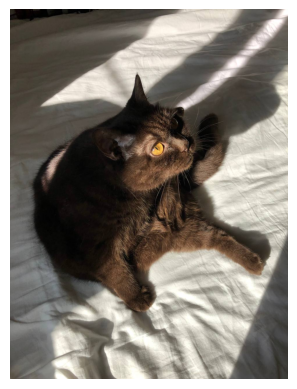

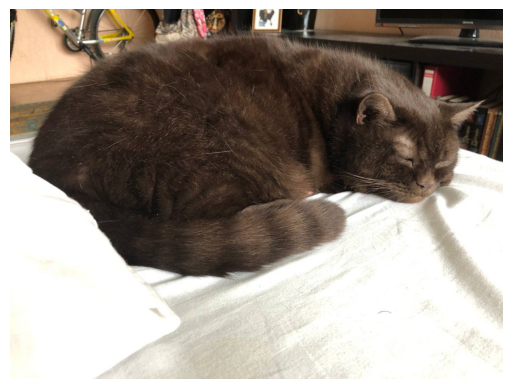

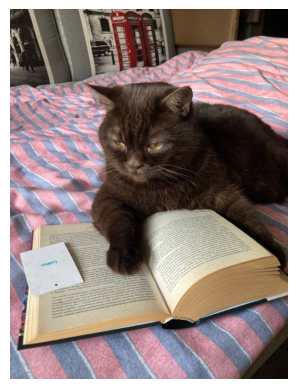

In [ ]:
# Querying for "Cats"
retrieved = multimodal_collection.query(query_texts=["cat"], include=['data'], n_results=3)
for img in retrieved['data'][0]:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

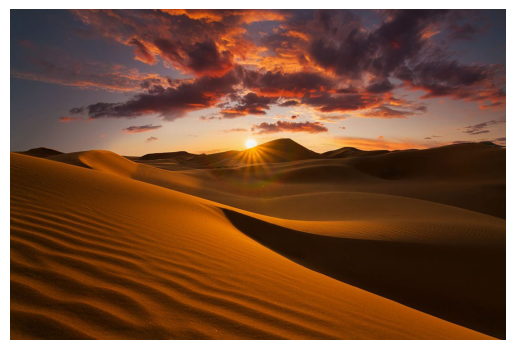

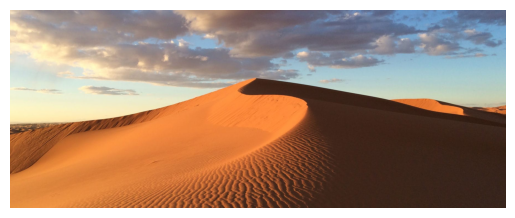

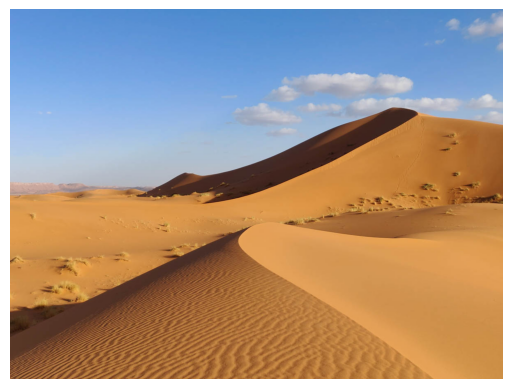

In [ ]:
# Querying for "Desert"
retrieved = multimodal_collection.query(query_texts=["desert"], include=['data'], n_results=3)
for img in retrieved['data'][0]:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

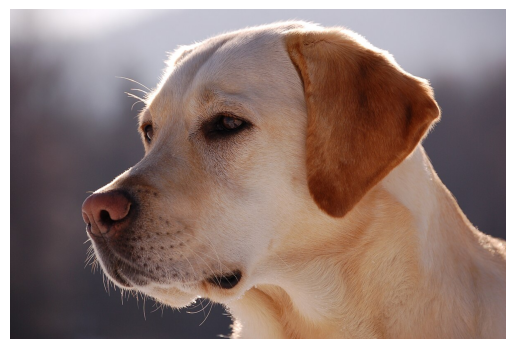

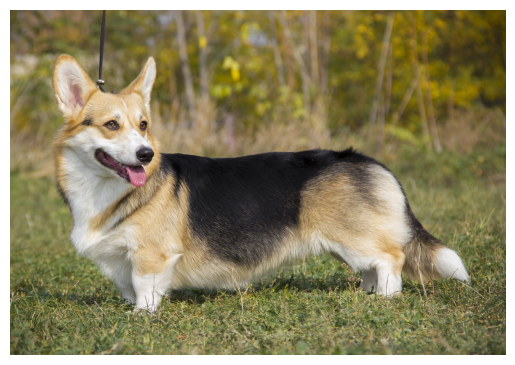

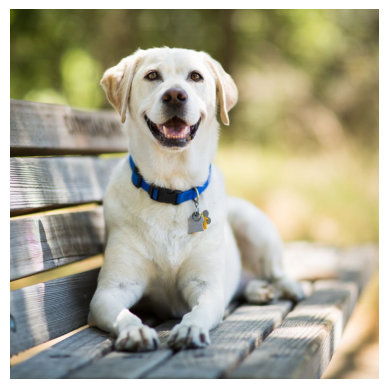

In [ ]:
# Querying for "Dogs"
retrieved = multimodal_collection.query(query_texts=["dog"], include=['data'], n_results=3)
for img in retrieved['data'][0]:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

Запасной датасет

Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

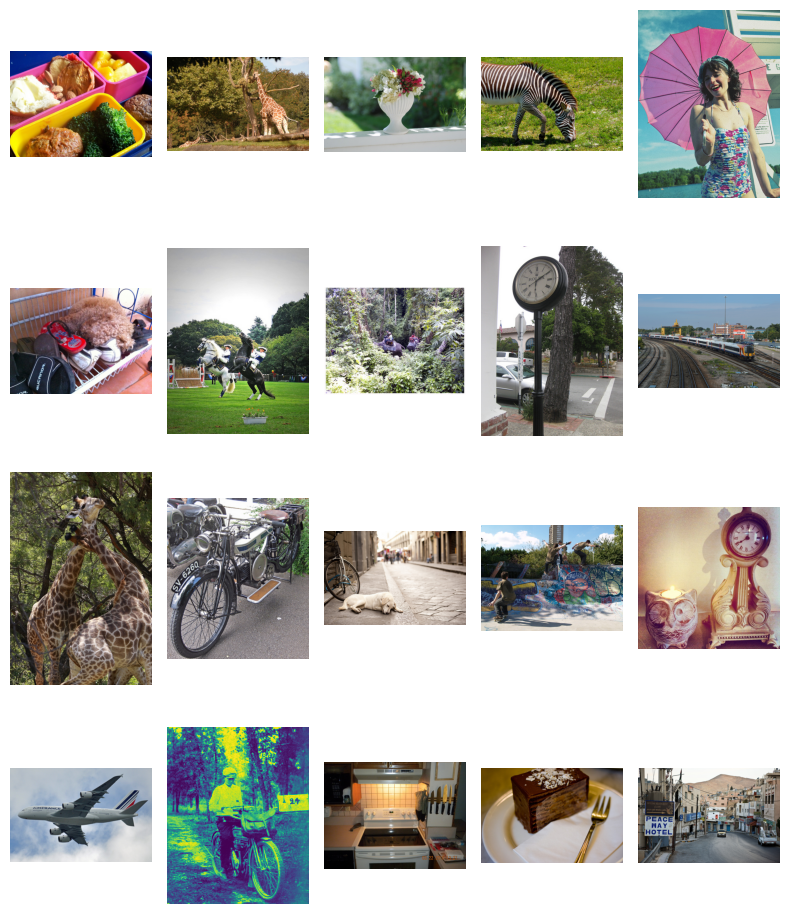

In [ ]:
# На всякий случай - готовый датасет на Hugging Face с картинками
from datasets import load_dataset

dataset = load_dataset(path="detection-datasets/coco", name="default", split="train", streaming=True)

IMAGE_FOLDER = "images"
N_IMAGES = 20

# For plotting
plot_cols = 5
plot_rows = N_IMAGES // plot_cols
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_rows*2, plot_cols*2))
axes = axes.flatten()

# Write the images to a folder
dataset_iter = iter(dataset)
os.makedirs(IMAGE_FOLDER, exist_ok=True)
for i in range(N_IMAGES):
    image = next(dataset_iter)['image']
    axes[i].imshow(image)
    axes[i].axis("off")

    image.save(f"images/{i}.jpg")

plt.tight_layout()
plt.show()